**Airbnb-Zillow Data Analysis**

**Determining profitability of New York City zipcodes**

The objective of this notebook is to present an analysis of publicly available data from Zillow and Airbnb to determine which zip codes in New York City (NYC) are most profitable and hence best to invest in. The analysis is roughly structured to follow the CRISP DM framework, an open standard process for data mining. 

The source code, outputs, insights and conclusions are combined and laid out in this notebook. All assumptions taken during the course of this analysis are also documented here and the analysis is concluded by highlighting some steps that can be taken to drive this analysis further and to make even more accurate decisions. 

## Assumptions

1. The investor will pay for the property in cash (i.e. no mortgage/interest rate will need to be accounted for).
2. The time value of money discount rate is 0% (i.e. $1 today is worth the same 100 years from now).
3. All properties and all square feet within each locale can be assumed to be homogeneous (i.e. a 1000 square foot property in a locale such as Bronx or Manhattan generates twice the revenue and costs twice as much as any other 500 square foot property within that same locale.)
4. The occupancy rate for an year is 75%
5. The properties are rented on Airbnb for the entire year 
6. If the room_type is 'private' for a listing, the rental price per night for the entire house/property is considered as the double of the price given in the data for all 2 bedroom properties 

## Importing necessary libraries

In [379]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [380]:
import warnings
warnings.filterwarnings('ignore')

## Reading Zillow and Airbnb data

### Declare variables for file names

In [381]:
zillow_file_name = 'Zip_Zhvi_2bedroom.csv'
airbnb_file_name = 'listings.csv.gz'

### Read data

In [382]:
zillow_costs = pd.read_csv(zillow_file_name, encoding = 'utf-8')
airbnb_rent = pd.read_csv(airbnb_file_name, encoding = 'utf-8')

## Understanding and cleaning Zillow data

### Checking the dimensions and datatypes

In [383]:
zillow_costs.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.0,60500.0,60900.0,...,82400,82300,82400,82300.0,82500,83200,83900,84100,83900,83700


In [384]:
zillow_costs.shape

(8946, 262)

### Looking at a summary of columns with non-zero missing values

In [385]:
def missing_summary(df):
    '''
    Takes a dataframe and returns a summary table of missing values and % missing values for each column in the dataframe 
    for columns with non-zero missing values
    
    '''
    n = len(df)
    missing_vals = df.isnull().sum()
    missing_vals_percent = round((missing_vals/n)*100, 2)
    summary_table = pd.concat([missing_vals, missing_vals_percent], axis = 1)
    summary_table = summary_table.rename(columns = {0 : 'Missing Values', 1 : '% of Missing Values'})
    summary_table = summary_table[summary_table.iloc[:,0] != 0].sort_values('% of Missing Values', ascending=False)
    return summary_table

In [386]:
#Calling the above function to get a column wise summary of missing values in zillow dataset
missing_summary(zillow_costs)

,Missing Values,% of Missing Values
1996-04,2662,29.76
1996-05,2582,28.86
1996-06,2582,28.86
1996-07,2577,28.81
1996-08,2576,28.79
1996-09,2576,28.79
1996-10,2576,28.79
1996-11,2566,28.68
1996-12,2566,28.68
1997-01,2542,28.41


It can be observed that only columns with median home price have missing values, going as high ~30% 

## Preparing zillow data
We now define a function that prepares the zillow data for further analysis. The function achieves the following objectives:
    - Filter rows corresponding to New York City
    - Drop the following columns: 'RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'
    - Unpivot date columns
    - Separate years and months in different columns
    - Rename 'RegionName' column to 'zipcode' and convert 'zipcode' column to integer type

In [387]:
def prepare_zillow(df, city_column):
    '''
    Takes a dataframe & city column and returns the prepared dataset that will be used for further analysis
    '''
    #Filter rows corresponding to New York City
    list_nyc = ['new york', 'nyc', 'new york city']
    df_nyc = df.loc[df[city_column].str.lower().isin(list_nyc), :]
    
    #Drop the columns that are not required for our analysis
    df_nyc = df_nyc.drop(columns = ['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'])
    
    #Unpivot all date columns
    df_nyc = pd.melt(df_nyc, id_vars = ['RegionName'], var_name = 'Year-Month', value_name = 'Median_Price')
    
    #Separate year and month and drop Year-Month column
    df_nyc[['Year', 'Month']] = df_nyc['Year-Month'].str.split('-', expand = True)
    df_nyc.drop(columns = ['Year-Month'], inplace=True)    
    
    #Rearrange columns
    df_nyc = df_nyc[['RegionName', 'Year', 'Month', 'Median_Price']]
    
    #Rename RegionName column to zipcode
    df_nyc = df_nyc.rename(columns = {'RegionName': 'zipcode'})
    df_nyc['zipcode'] = df_nyc['zipcode'].astype('int')
    
    return df_nyc

In [388]:
#Calling the above function to obtain our prepared zillow dataset
zillow_nyc = prepare_zillow(df = zillow_costs, city_column = 'City')
zillow_nyc.head()

,zipcode,Year,Month,Median_Price
0,10025,1996,04,NaN
1,10023,1996,04,NaN
2,10128,1996,04,NaN
3,10011,1996,04,NaN
4,10003,1996,04,NaN


In [389]:
zillow_nyc.shape

(6375, 4)

In [390]:
#Get the number of unique zip codes present in the New York City dataframe
zillow_nyc['zipcode'].nunique()

25

We have 25 unique zipcodes corresponding to NYC present in our dataset now

**From hereon, we will focus only on median home values starting from year 2011. This is because the approach that we have taken for our analysis will not require past home values**

Let us now look at how the home values are distributed within each year, starting from 2011

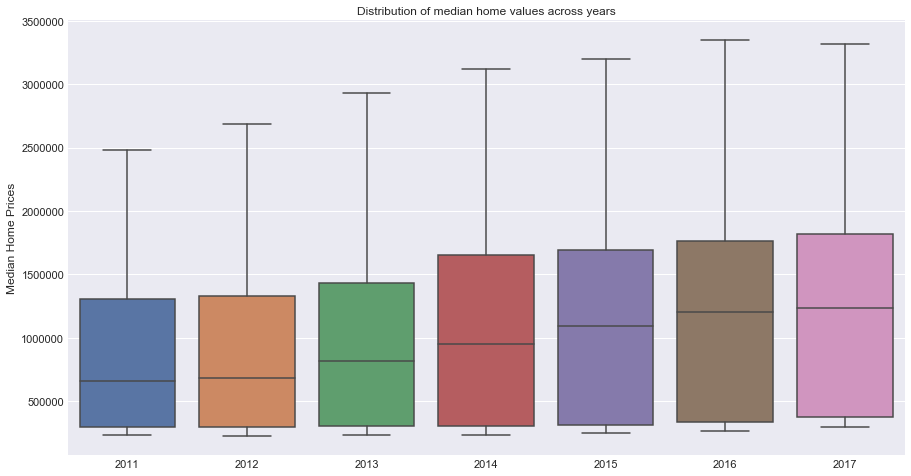

In [391]:
plt.figure(figsize=(15,8))
_ = sns.boxplot(x = 'Year', y = 'Median_Price', data = zillow_nyc[zillow_nyc['Year'] >= '2011'])
_ = plt.xlabel("")
_ = plt.ylabel("Median Home Prices")
_ = plt.title("Distribution of median home values across years")

From the boxplot above, we can see that for each year, the median value (medians for all months in a year) lies roughly in the middle. Therefore, for simplicity, we represent each year with just one home value, which is the median value for each year

In [392]:
#Representing each year(starting 2011) with its corresponding median value
zillow_nyc_price = zillow_nyc.groupby(['zipcode', 'Year'])['Median_Price'].median().reset_index()
zillow_nyc_price = zillow_nyc_price.loc[zillow_nyc_price['Year'] >= '2011']

In [393]:
zillow_nyc_price.head()

,zipcode,Year,Median_Price
15,10003,2011,1363050.0
16,10003,2012,1370400.0
17,10003,2013,1533100.0
18,10003,2014,1735500.0
19,10003,2015,1809000.0


Now that we have a single home value for each year, let us look at how the median home values have fared during:
    1. During the 7 year period between 2011 and 2017
    2. During the 3 year period between 2015 and 2017

In [394]:
#Style
plt.style.use('seaborn-darkgrid')

#Create a color palette
palette = plt.get_cmap('Set1')

In [395]:
#Defining a function to return the required area plots
def area_plot(df, category, x_axis, y_axis, start_year, end_year):
    '''
    Function takes a dataframe, grouping category, column for x and y axes, and start & end year as inputs. Returns area 
    plot based on the inputs provided
    
    '''
    data = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    #Create a facetgrid: Initialize it
    g = sns.FacetGrid(data, col=category, hue=category, col_wrap=5)

    # Add the line over the area with the plot function
    g = g.map(plt.plot, x_axis, y_axis)

    # Fill the area with fill_between
    g = g.map(plt.fill_between, x_axis, y_axis, alpha=0.2)

    # Control the title of each facet
    g = g.set_titles("Median home values")

    plt.subplots_adjust(top=0.92)
    g = g.fig.suptitle('Change in median price from 2011 to 2017')

    plt.show()

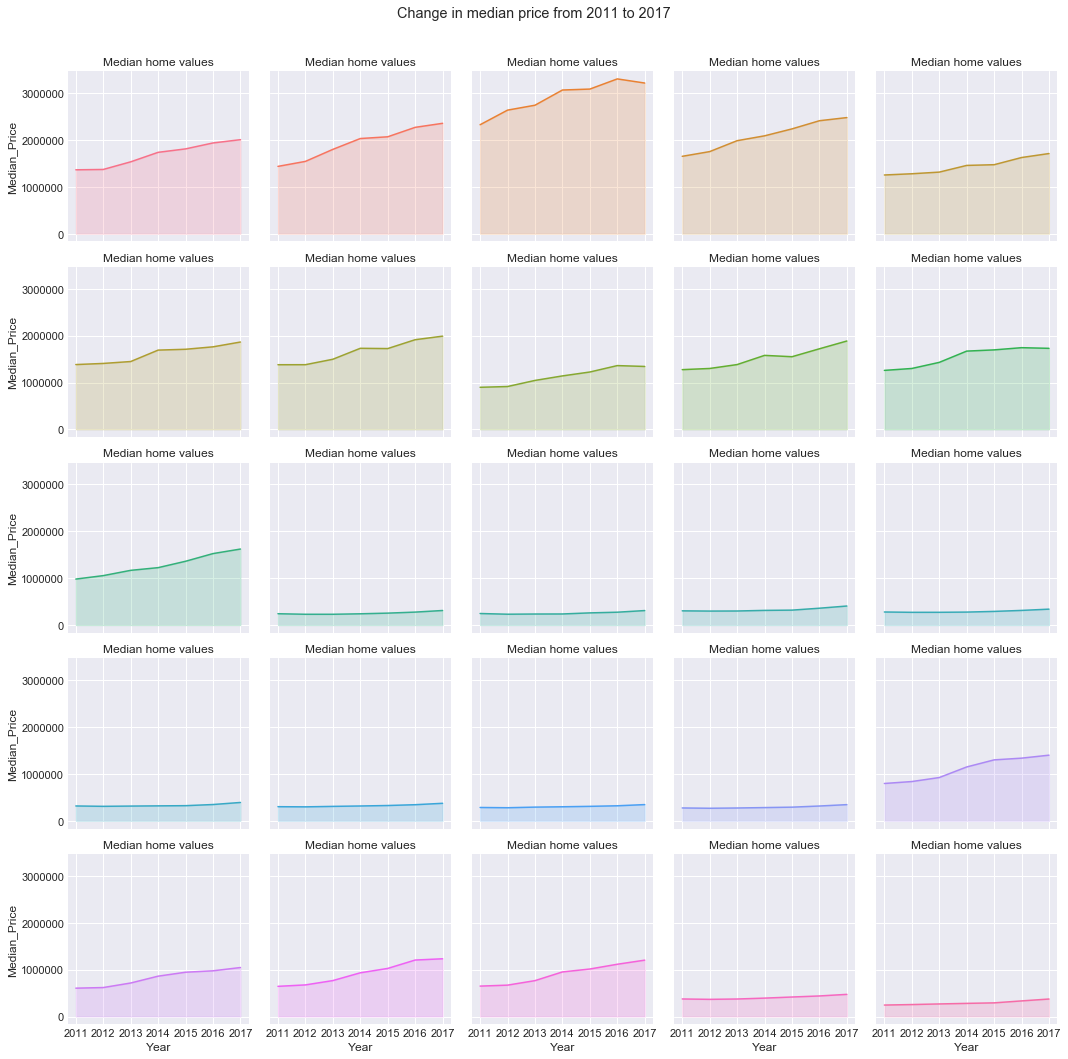

In [396]:
#Calling the above function to get area plots for median prices between 2011 and 2017
area_plot(zillow_nyc_price, 'zipcode', 'Year', 'Median_Price', '2011', '2017')

We can see that some zipcodes have experienced a substantial rise in home values (10003, 10011, 10013, 10014). However, it seems that during the last 3 years, home values have remained fairly constant. We can see this more clearly in the plot below

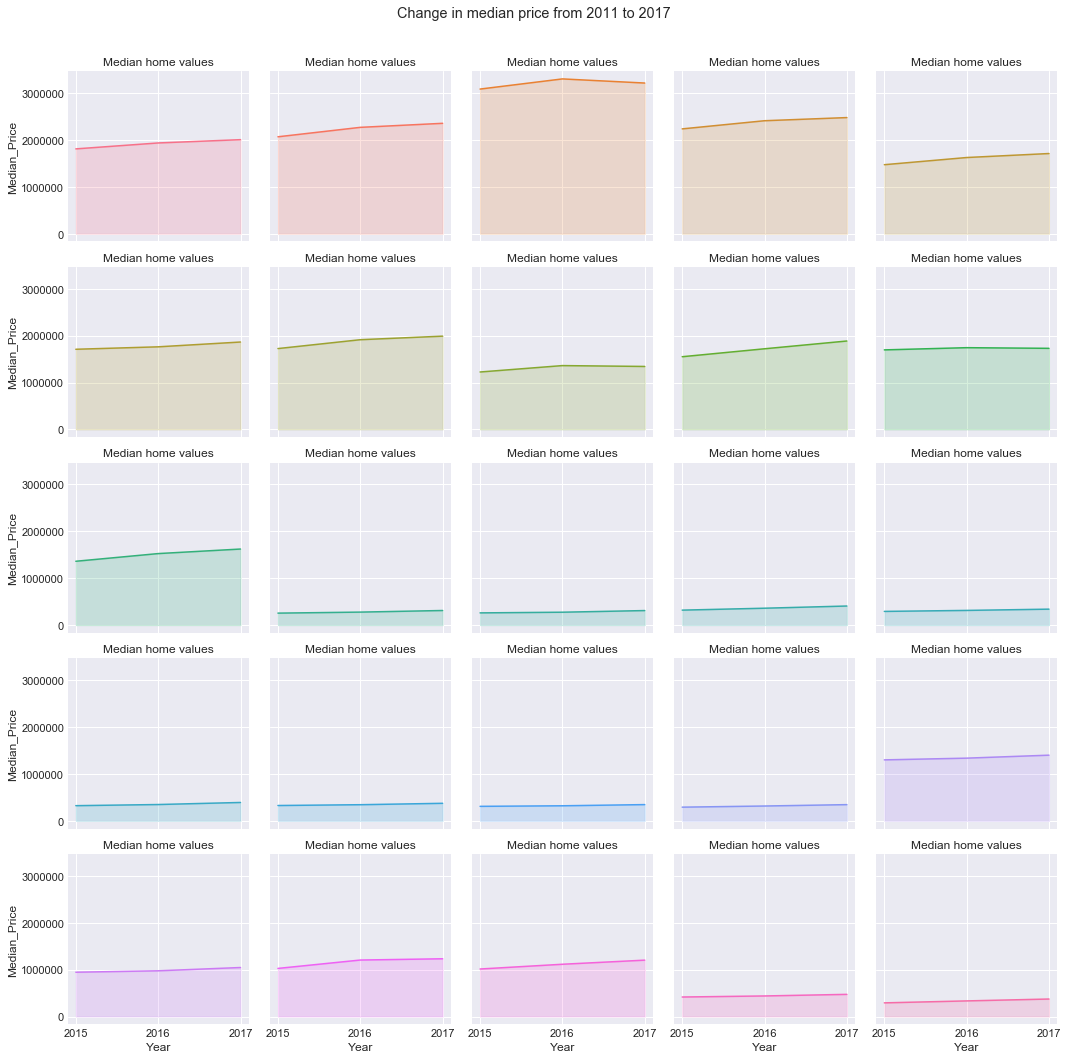

In [397]:
area_plot(zillow_nyc_price, 'zipcode', 'Year', 'Median_Price', '2015', '2017')

From the above plot, it can be observed that median house prices for NYC zip codes have remained fairly constant between the period 2015 and 2017. To resolve the issue of inconsistent units of time between the Zillow and Airbnb datasets, we can use a time series forecasting model such as ARIMA to predict the house values in 2019. However, predicted values for almost 2 years ahead could give inaccurate results. 

**Therefore, to reduce complexity, and based on the plot above, we will assume that the house values in each zipcode remain the same as they were in 2017. Going forward, we compute our metrics based on this assumption.**

**Transforming our NYC price dataframe to show a single price per RegionName (zip code), that is the 2017-06 price**

In [398]:
zillow_nyc_price = zillow_nyc_price.loc[zillow_nyc_price['Year'] == '2017'].drop('Year', axis = 1)

In [399]:
zillow_nyc_price.head()

,zipcode,Median_Price
21,10003,2005500.0
43,10011,2354000.0
65,10013,3212450.0
87,10014,2476250.0
109,10021,1709950.0


In [400]:
zillow_nyc_price.shape

(25, 2)

## Understanding and cleaning Aibnb data

### Checking the dimensions and datatypes

In [401]:
airbnb_rent.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20190708031610,2019-07-09,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,f,moderate,f,f,6,0,5,1,0.21
1,2595,https://www.airbnb.com/rooms/2595,20190708031610,2019-07-09,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.38
2,3647,https://www.airbnb.com/rooms/3647,20190708031610,2019-07-08,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
3,3831,https://www.airbnb.com/rooms/3831,20190708031610,2019-07-09,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.64
4,5022,https://www.airbnb.com/rooms/5022,20190708031610,2019-07-08,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10


In [402]:
airbnb_rent.shape

(48895, 106)

### Looking at a summary of columns with non-zero missing values

In [403]:
missing_summary(airbnb_rent)

,Missing Values,% of Missing Values
thumbnail_url,48895,100.00
medium_url,48895,100.00
host_acceptance_rate,48895,100.00
xl_picture_url,48895,100.00
jurisdiction_names,48882,99.97
license,48874,99.96
square_feet,48487,99.17
monthly_price,43647,89.27
weekly_price,42891,87.72
notes,28704,58.71


The airbnb dataset has a lot of missing values with some columns having 100% null-values. We can also see that the zipcode column has 517 missing values. Since we will join the Zillow and Airbnb datasets, we need to find a way to impute these values. We will address these issues in the data preparation stage

### Looking at the zipcode and price column values more closely

In [404]:
airbnb_rent['zipcode'].unique()

array(['11218', '10018', '10027', '11238', '10029', '10016', '11216',
       '10019', '10025', '10002', '10036', '11215', '10014', '11211',
       '11205', '10011', '11217', '10034', '10003', '10031', '11222', nan,
       '11237', '11226', '10009', '10024', '11225', '11101', '11221',
       '11206', '10010', '11249', '10001', '10162', '10035', '10032',
       '10075', '11377', '11201', '11233', '11231', '10023', '10128',
       '10040', '11234', '11367', '10028', '11104', '10065', '10301',
       '10452', '10006', '10039', '11385', '10021', '11434', '11379',
       '10026', '11105', '10044', '10022', '10013', '11103', '10473',
       '10475', '11213', '10468', '11102', '10038', '10033', '11427',
       '11693', '10012', '11375', '10470', '10030', '10453', '11223',
       '10469', '11208', '11207', '10451', '11235', '10314', '11209',
       '11204', '10305', '11232', '10017', '11373', '11224', '11372',
       '11412', '10004', '11203', '11374', '10466', '11106', '10304',
       '11220',

We can see that there are some data quality issues with values in the zipcode column:
    - Some zipcode values are stored in the extended format (Zip+4 code)
    - Some values have a decimal point followed by a trailing zero
    - Some values have escape sequences (\n) after the 5 digit zipcode
We will resolve these issues in the data preparation stage

In [405]:
airbnb_rent['price'].unique()

array(['$149.00', '$225.00', '$150.00', '$89.00', '$80.00', '$200.00',
       '$60.00', '$79.00', '$135.00', '$85.00', '$120.00', '$140.00',
       '$215.00', '$99.00', '$190.00', '$299.00', '$130.00', '$110.00',
       '$44.00', '$180.00', '$50.00', '$52.00', '$55.00', '$70.00',
       '$35.00', '$40.00', '$68.00', '$115.00', '$151.00', '$228.00',
       '$144.00', '$69.00', '$49.00', '$375.00', '$250.00', '$275.00',
       '$230.00', '$51.00', '$65.00', '$105.00', '$95.00', '$145.00',
       '$285.00', '$94.00', '$800.00', '$131.00', '$98.00', '$100.00',
       '$125.00', '$175.00', '$500.00', '$101.00', '$220.00', '$59.00',
       '$350.00', '$199.00', '$325.00', '$235.00', '$170.00', '$400.00',
       '$75.00', '$90.00', '$185.00', '$77.00', '$76.00', '$160.00',
       '$195.00', '$156.00', '$219.00', '$475.00', '$165.00', '$196.00',
       '$83.00', '$123.00', '$265.00', '$249.00', '$121.00', '$45.00',
       '$71.00', '$64.00', '$159.00', '$189.00', '$239.00', '$305.00',
       '

The price column has values stored along with the dollar currency sign (\$) and also have commas between the digits

## Preparing Airbnb data

We now define a function that prepares the Airbnb data for further analysis. Furthermore, since there are 106 columns, we will try to reduce this number based on the objective of our data analysis. The function achieves the following objectives:
- Removes columns with a high % of null values - We use of threshold of 50% null values
- Filters rows that correspond to 2 bedroom properties
- Correctly formats the values in the zipcode and price columns. For price, we make an assumption that if the room_type is private room, then the rent for the entire house can be considered as price * 2, since all we have left in our dataset are 2 bedroom properties
- Removes columns that provide details about the property, the host, various urls, etc. This includes columns that provide information on property amenities, experiences offered near the property, etc.
- Removes columns that are used as internal identifiers by Airbnb

In [406]:
def prepare_airbnb(df):
    '''
    Function takes input as the dataframe to be prepared. Returns the prepared dataset and a list of columns that were
    removed during this process
    '''
    #Remove columns with more than 50% null values
    df_airbnb = df.dropna(thresh = 0.50 * len(df), axis = 1)
    
    #Filter and keep rows that correspond to 2 bedroom properties
    df_airbnb = df_airbnb[df_airbnb['bedrooms'] == 2]
    
    #Correctly format the zipcode and price columns
    #Convert zipcode column to string
    #df_airbnb['zipcode'] = df_airbnb['zipcode'].astype(str)
    
    #Retaining only the first 5 characters of zipcode column
    #df_airbnb['zipcode'] = df_airbnb['zipcode'].str[:5]
        
    #Remove '$' and ',' from the price column values and store them as float type
    #For Private room type, calculate price as price*2
    df_airbnb['price'] = df_airbnb['price'].str.replace('$', '')
    df_airbnb['price'] = df_airbnb['price'].str.replace(',', '')
    df_airbnb['price'] = df_airbnb['price'].astype('float')
    
    for index, row in df_airbnb.iterrows():
        if row['room_type'] == 'Private room':
            row['price'] = row['price']*2
        else:
            row['price'] = row['price']  
    
    #Find and remove columns that will not be useful for determining the profitability of a zip code, i.e. metadata for
    #properties & hosts and columns that are used by Airbnb as internal identifiers
    columns_to_remove = []
    for column in airbnb.columns:
        if column.startswith(("host", "require")):
            columns_to_remove.append(column)
        elif column.endswith(("url", "nights")):
            columns_to_remove.append(column)
    df_airbnb = df_airbnb[df_airbnb.columns[~df_airbnb.columns.isin(columns_to_remove)]]
    
    return df_airbnb, columns_to_remove

In [407]:
#Calling the above function and storing the return values
airbnb_rent, columns_removed = prepare_airbnb(airbnb_rent)

In [408]:
airbnb_rent.shape

(6497, 68)

We are now left with 68 columns after the preparation stage. Let us look at the columns that were removed and revalidate from the dictionary that these columns were indeed not necessary for our analysis further

In [409]:
columns_removed

['listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'requires_license',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

We have confirmed that the removed columns were not required for our analysis. We can remove some more columns based on their definition in the data dictionary. We will implement this manually

**Removing some more columns related to property/neighbourhood/host description and other miscellaneous columns**

In [410]:
cols_to_drop_manual = ['id', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered',
                      'notes', 'access', 'interaction', 'house_rules', 'is_location_exact', 'amenities', 'security_deposit',
                      'cleaning_fee', 'guests_included', 'extra_people', 'calendar_updated', 'calendar_last_scraped',
                      'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                       'review_scores_communication', 'requires license', 'license', 'jurisdiction_names',
                       'instant_bookable', 'cancellation_policy', 'calculated_host_listings_count']
airbnb_rent = airbnb_rent[airbnb_rent.columns[~airbnb_rent.columns.isin(cols_to_drop_manual)]]

In [411]:
airbnb_rent.shape

(6497, 42)

We now have 42 columns in our Airbnb rental listings dataset

**Handling the null values in zipcode column** <br>
For each missing value in zipcode column, we will replace it with the most frequently occuring zipcode in it's respective neighbourhood. For this purpose, we obtain the mode of each neighbourhood. For neighbourhood, we will use the 'neighbourhood_group_cleansed' column

In [412]:
#Get a list of unique neighbourhoods in our dataset
list_of_neighbourhoods = list(airbnb_rent['neighbourhood_group_cleansed'].unique())
list_of_neighbourhoods

['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

In [413]:
#Iterate over all neighbourhoods to generate a dictionary with neighbourhood as key and respective zipcode modes as values
most_frequent_zipcodes = {}
for neighbour in list_of_neighbourhoods:
    value = airbnb_rent.loc[airbnb_rent['neighbourhood_group_cleansed'] == neighbour, 'zipcode'].mode()[0]
    most_frequent_zipcodes[neighbour] = value
most_frequent_zipcodes

{'Manhattan': '10009',
 'Brooklyn': '11211',
 'Queens': '11385',
 'Bronx': '10451',
 'Staten Island': '10301'}

In [414]:
#Map dictionary values to NaN values in zipcode column
airbnb_rent['zipcode'] = airbnb_rent['zipcode'].fillna(airbnb_rent['neighbourhood_group_cleansed'].map(most_frequent_zipcodes))

In [415]:
#Confirm that all missing values in zipcode column have been imputed
print("There are", str(airbnb_rent['zipcode'].isnull().sum()), "missidng values in the zipcode column")

There are 0 missidng values in the zipcode column


In [416]:
#Convert 'zipcode' column to int
airbnb_rent['zipcode'] = airbnb_rent['zipcode'].astype('int')

## Joining the Zillow and Airbnb datasets
We now join the Zillow and Airbnb datasets. We will use an inner join on zipcode column to accomplish this. This will ensure that we will only have those zipcodes in our combined dataset that are present in the both Zillow and Airbnb datasets

In [417]:
#Join zillow and airbnb datasets on the zipcode column
combined = pd.merge(left = airbnb_rent, right = zillow_nyc_price, left_on = 'zipcode', right_on = 'zipcode')
combined.head()

,neighborhood_overview,transit,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,...,last_review,review_scores_rating,review_scores_location,review_scores_value,is_business_travel_ready,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Median_Price
0,"We are in the heart of Park Slope, a truly bea...",We are a 5-7 minute walk to the Union Street R...,"Brooklyn, NY, United States",Brooklyn,Park Slope,Brooklyn,Brooklyn,NY,11215,New York,...,2017-09-24,100.0,10.0,10.0,f,1,0,0,0.16,1045400.0
1,NaN,NaN,"Brooklyn, NY, United States",Brooklyn,South Slope,Brooklyn,Brooklyn,NY,11215,New York,...,2018-12-30,95.0,10.0,10.0,f,2,0,0,0.24,1045400.0
2,Great for families and friends. Close to bouti...,"The F, G and R trains are only 5 minutes away ...","Brooklyn, NY, United States",Gowanus,Gowanus,Brooklyn,Brooklyn,NY,11215,New York,...,2019-07-06,94.0,10.0,9.0,f,1,0,0,2.17,1045400.0
3,Quiet tree-lined street Two shopping/restauran...,On street parking. Also parking garage 4 block...,"Brooklyn, NY, United States",Park Slope,Windsor Terrace,Brooklyn,Brooklyn,NY,11215,New York,...,2019-05-17,97.0,10.0,10.0,f,0,1,0,0.26,1045400.0
4,Park Slope is considered one of New York City'...,"The F, G and R train are a 5-minute walk takin...","Brooklyn, NY, United States",Park Slope,South Slope,Brooklyn,Brooklyn,NY,11215,New York,...,2019-06-28,97.0,10.0,10.0,f,2,1,0,3.97,1045400.0


## Data Exploration
We will conduct exploratory data analysis in this section to understand what features from the data can be used for developing our metrics for profitability of a zipcode

### Review Scores for each zipcode
We will try to identify if certain zipcodes consistently receive better review scores for location (review_scores_location) compared to others. If there exists a clear distinction between zipcodes, the review scores feature could help us identify which zipcodes are preferred in terms of their location

In [418]:
#Convert zipcode column to category type to make plotting easier
combined['zipcode'] = combined['zipcode'].astype('category')

In [419]:
combined['zipcode'].nunique()

24

We will need to normalize the review_scores_location column by the number of reviews each zipcode has received since there is some imbalance in the number of reviews received by each zipcode

In [420]:
#Calculate the sum of review scores received by each zipcode
review_score_plot = combined.groupby('zipcode')['review_scores_location'].sum().reset_index()

#Calculate the number of review scores received by each zipcode
review_score_plot_count = combined.groupby('zipcode')['review_scores_location'].count().reset_index()

#Combine the above dataframes
review_score_plot = pd.merge(left = review_score_plot, right = review_score_plot_count, left_on = 'zipcode', right_on = 'zipcode')

#Rename the columns
review_score_plot.columns = ['zipcode', 'review_scores_sum', 'review_scores_count']

#Calculate normalized scores
review_score_plot['normalized_review_scores'] = review_score_plot['review_scores_sum']/review_score_plot['review_scores_count']

In [421]:
review_score_plot.dtypes

zipcode                     category
review_scores_sum            float64
review_scores_count            int64
normalized_review_scores     float64
dtype: object

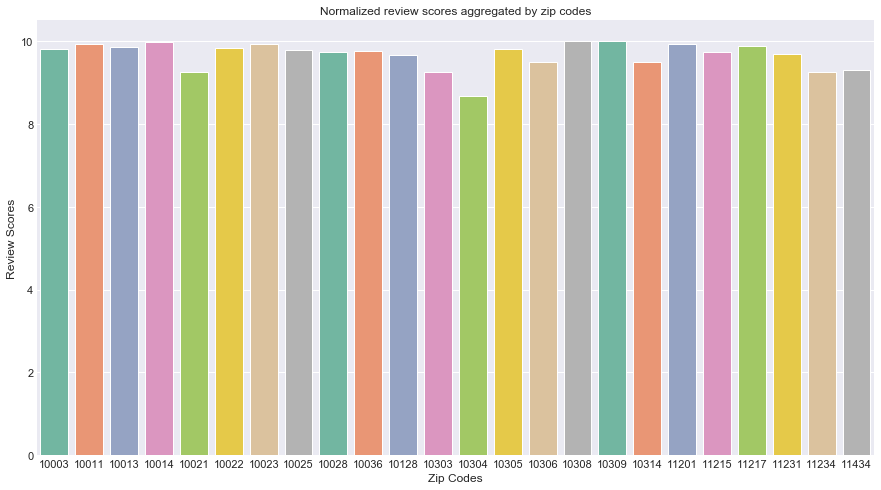

In [422]:
#Plot normalized review scores against each zipcode
plt.figure(figsize=(15,8))
_ = sns.barplot(x = 'zipcode', y = 'normalized_review_scores', data = review_score_plot, palette = 'Set2')
_ = plt.xlabel("Zip Codes")
_ = plt.ylabel("Review Scores")
_ = plt.title("Normalized review scores aggregated by zip codes")

#### Conclusion
We cannot see a substantial difference in the review scores received by each zip code. All of them have received pretty good scores. The hypothesized metric, based on review_scores_location should not be used for identifying profitable zipcodes

### Demand for properties across zipcodes
In this section, we will look at the distribution of properties across zipcode. This could help us understand where the demand of airbnb properties is higher - More properties implies more demand in that zipcode

In [423]:
#Replace neighbourhood from Brooklyn to Manhattan for zipcode 10013
#combined.loc[(combined['zipcode'] == '10013') & (combined['neighbourhood_group_cleansed'] == 'Brooklyn'),
             #'neighbourhood_group_cleansed'] = 'Manhattan'

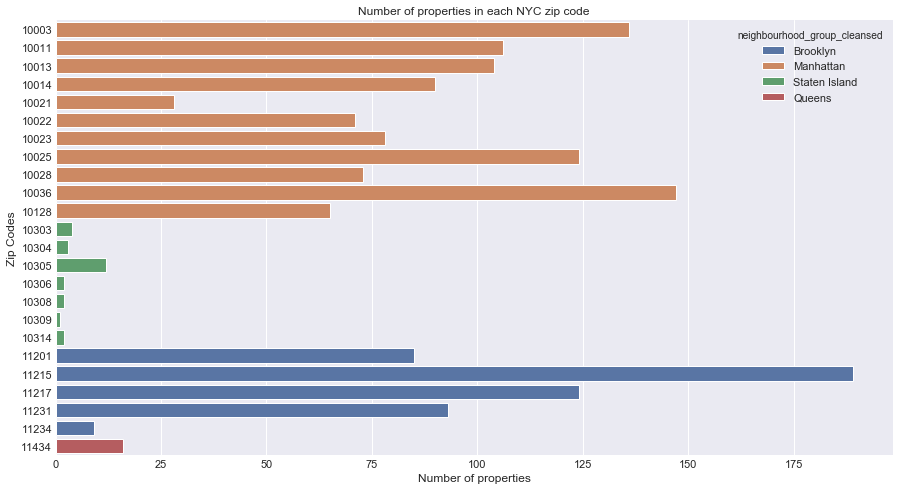

In [424]:
plt.figure(figsize=(15,8))
_ = sns.countplot(y = 'zipcode', hue = 'neighbourhood_group_cleansed', data = combined, dodge = False)
_ = plt.xlabel("Number of properties")
_ = plt.ylabel("Zip Codes")
_ = plt.title("Number of properties in each NYC zip code")

#### Conclusion
As seen from the plot, zipcodes in Manhattan and Brooklyn should be favoured since it seems these areas currently have a considerably higher number of properties compared to Queens and Staten Island. This could be to cater the high demand for rentals in Manhattan and Brooklyn
However, we should also look at a caveat here. More properties also inherently means more competition since a customer has more choices to pick from in a particular neighbourhood. This is something that can be looked at as a future consideration

### Number of reviews received
In this section, we focus one the number of reviews received by each zipcode. More reviews could signal more popularity

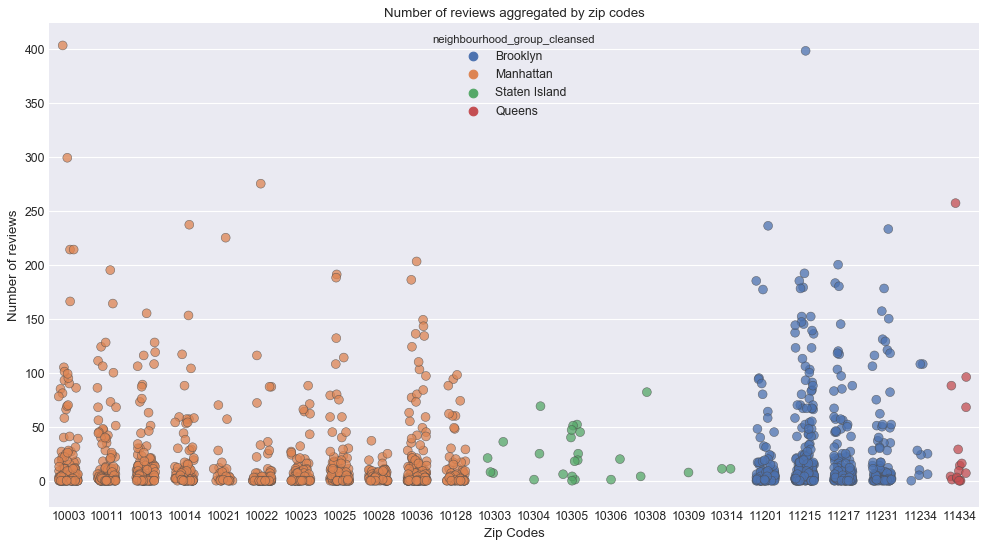

In [425]:
fig, ax = plt.subplots(figsize=(15,8), dpi= 80)    
sns.stripplot(combined['zipcode'], combined['number_of_reviews'], hue = combined['neighbourhood_group_cleansed'],
              jitter=0.25, size=8, alpha = 0.75, edgecolor= 'gray', ax=ax, linewidth=.5)
_ = plt.xlabel("Zip Codes")
_ = plt.ylabel("Number of reviews")
_ = plt.title("Number of reviews aggregated by zip codes")

It can be seen that overall properties in Manhattan and Brooklyn have received more reviews (some receiving as high as ~400). 

### Distribution of rental price per night across neighbourhoods
In this section, we take a look at how the per night rental price is distributed across each neighbourhood

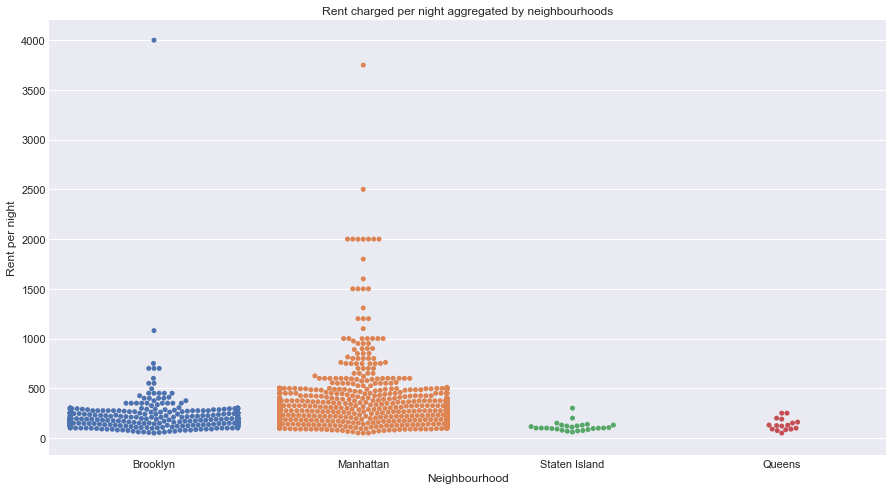

In [426]:
plt.figure(figsize=(15,8))
_ = sns.swarmplot(x="neighbourhood_group_cleansed", y="price", data=combined)
_ = plt.xlabel("Neighbourhood")
_ = plt.ylabel("Rent per night")
_ = plt.title("Rent charged per night aggregated by neighbourhoods")

It can be seen from the plot that rental properties in Manhattan garner a relatively higher rent per night for 2 bedroom properties. Properties in Brooklyn also seem favourable on this critera. However, we need to look at the distribution of home prices in the neighbourhoods as well to assess how early can the investor break-even

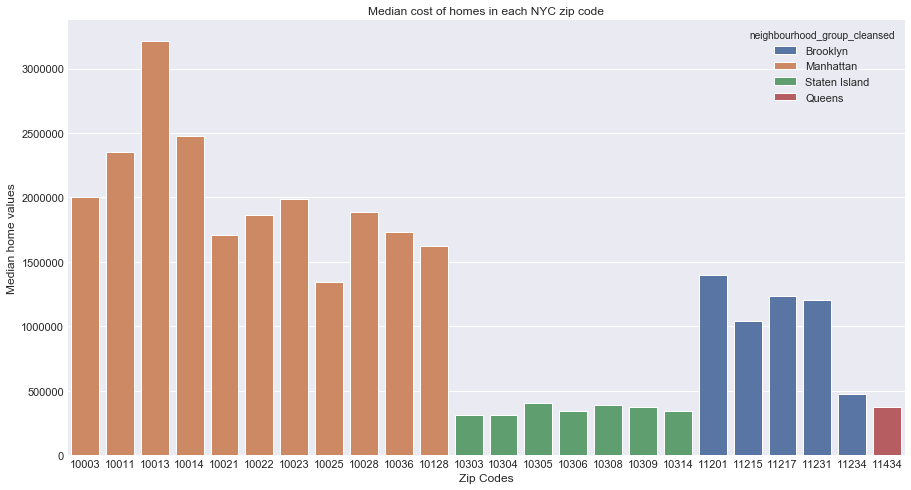

In [427]:
plt.figure(figsize=(15,8))
_ = sns.barplot(x = 'zipcode', y = 'Median_Price', hue = 'neighbourhood_group_cleansed', data = combined, dodge = False)
_ = plt.xlabel("Zip Codes")
_ = plt.ylabel("Median home values")
_ = plt.title("Median cost of homes in each NYC zip code")

#### Conclusion
The plots above suggest that although one can expect higher to earn higher rent per night in Manhattan and Brooklyn areas, the cost of homes is also higher in these neighbourhoods. We will calculate the % annual return on investment to get a clear picture of how the returns will be compared to the investment made

### How far ahead are properties booked in each zip code?
In this section, we try and identify if there are some zipcodes for which the properties are booked well in advance. This could mean that properties in these zipcodes are generally in demand. 

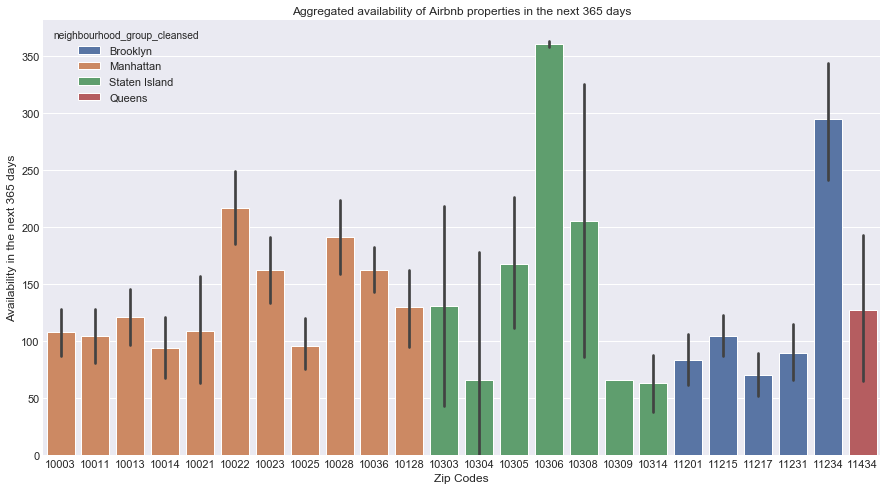

In [428]:
plt.figure(figsize=(15,8))
_ = sns.barplot(x = 'zipcode', y = 'availability_365', hue = 'neighbourhood_group_cleansed', data = combined, dodge = False)
_ = plt.xlabel("Zip Codes")
_ = plt.ylabel("Availability in the next 365 days")
_ = plt.title("Aggregated availability of Airbnb properties in the next 365 days")

The plot above shows that properties in Staten Island are booked in advance, since their availability in the next 365 days is less.

## Conclusion
### Calculating the metrics
Based on the exploratory analysis, popularity of zipcodes can be determined based on the following factors:
- % Annual Return On Investment (ROI): This is going to be our key quantitaive metric for the decision. It will be calculated as:
              (Annual Return (including 75% occupancy rate) per year / Total investment) * 100
- Next we can look at some qualitative factors that drive occupancy:
    - Demand: Count of airbnb properties for each zipcode 
    - Popularity: Count of reviews received by each property, grouped by each zipcode
    - Availability: Number of days the property is available in the next 365 days, summed over each zipcode    
    
### Methodology for score calculation
- A weight is assigned each of the 4 metrics. The ROI metric is assigned the highest weight of 40% and the rest of the metrics are each assigned a weight of 20%
- Within each metric, a rank score is assigned for the top 5 zipcodes. First ranked zipcode receives a score of 50, second zipcode a score of 40 and so on till the 5th ranked zipcode
- All 4 metric dataframes are combined and the scores for each zipcode are summed up to get the total score?

#### Defining a function to calculate the metrics and score for each zipcode

In [431]:
def calculate_metrics(df):
    #Define weight arrays for each metric
    rank_score = [50, 40, 30, 20, 10]
    weight_quant = [0.40, 0.40, 0.40, 0.40, 0.40]
    weight_qual = [0.20, 0.20, 0.20, 0.20, 0.20]
        
    #Calculate median rent per night for each zip code
    df_roi = df[['zipcode', 'price', 'Median_Price']].copy()
    df_roi = df_roi.groupby(['zipcode', 'Median_Price'])['price'].median().reset_index()
    df_roi = df_roi.rename(columns = {'price': 'Median rent per night'})
    
    #Calculate % annual ROI
    df_roi['Annual ROI(%)'] = ((df_roi['Median rent per night']*365*0.75)/(df_roi['Median_Price']))*100
    df_roi = df_roi.nlargest(5, 'Annual ROI(%)')
    print(df_roi, '\n')
    df_roi['ROI Score'] = [a * b for a, b in zip(rank_score, weight_quant)]
    metric_roi = df_roi.drop(['Median_Price', 'Median rent per night', 'Annual ROI(%)'], axis = 1)
    
    #Get top zipcodes based on demand
    df_demand = df['zipcode'].value_counts().reset_index().rename(columns = {'index':'zipcode','zipcode':'Property count'}).nlargest(5, 'Property count')
    print(df_demand, '\n')
    df_demand['Demand Score'] = [a * b for a, b in zip(rank_score, weight_qual)]
    metric_demand = df_demand.drop('Property count', axis = 1)
    
    #Get top zipcodes based on popularity
    df_popularity = df.groupby(['zipcode', 'neighbourhood_group_cleansed'])['number_of_reviews'].sum().reset_index()
    df_popularity = df_popularity.sort_values(by = 'number_of_reviews').nlargest(5, 'number_of_reviews')
    print(df_popularity, '\n')
    df_popularity['Popularity Score'] = [a * b for a, b in zip(rank_score, weight_qual)]
    metric_popularity = df_popularity.drop(['neighbourhood_group_cleansed', 'number_of_reviews'], axis = 1)
    
    #Get top zipcodes based on availability
    df_availability = df.groupby(['zipcode', 'neighbourhood_group_cleansed'])['availability_365'].sum().reset_index().sort_values(by = 'availability_365', ascending = True)
    df_availability = df_availability.iloc[0:5,]
    print(df_availability, '\n')
    df_availability['Availability Score'] = [a * b for a, b in zip(rank_score, weight_qual)]
    metric_availability = df_availability.drop(['neighbourhood_group_cleansed', 'availability_365'], axis = 1)
    
    #Join all metrics dataframes into one and replace NaNs with zero
    metrics = pd.concat([metric_roi,metric_demand, metric_popularity, metric_demand],axis = 0)
    metrics[['Demand Score', 'Popularity Score', 'ROI Score']] = metrics[['Demand Score', 'Popularity Score', 'ROI Score']].fillna(value=0)
    
    #Calculate sum of all scores for each zipcode and return the top 5 profitable zipcodes
    metrics = metrics.groupby('zipcode').sum().reset_index()
    metrics['Total Score'] = metrics['Demand Score'] + metrics['ROI Score'] + metrics['Popularity Score']
    metrics = metrics.sort_values(by = 'Total Score').nlargest(5, 'Total Score')
    
    return metrics

In [432]:
metrics = calculate_metrics(combined)

   zipcode  Median_Price  Median rent per night  Annual ROI(%)
14   10306      341250.0                  117.5       9.425824
11   10303      312450.0                  107.5       9.418507
23   11434      373950.0                  127.0       9.297032
12   10304      311050.0                   95.0       8.360794
15   10308      392100.0                  109.5       7.644893 

  zipcode  Property count
0   11215             189
1   10036             147
2   10003             136
3   11217             124
4   10025             124 

   zipcode neighbourhood_group_cleansed  number_of_reviews
20   11215                     Brooklyn               5695
0    10003                    Manhattan               3247
21   11217                     Brooklyn               2794
10   10036                    Manhattan               2739
22   11231                     Brooklyn               2456 

   zipcode neighbourhood_group_cleansed  availability_365
17   10309                Staten Island         

**Based on the metrics defined above, here are the 5 most profitable zip codes in NYC**

In [434]:
metrics.reset_index().drop('index', axis = 1)

,zipcode,Demand Score,Popularity Score,ROI Score,Total Score
0,11215,20.0,10.0,0.0,30.0
1,10306,0.0,0.0,20.0,20.0
2,10036,16.0,4.0,0.0,20.0
3,10003,12.0,8.0,0.0,20.0
4,10303,0.0,0.0,16.0,16.0


Based on the approach outlined, these are the most profitable zip codes to invest in:
- 11215
- 10306
- 10036
- 10003
- 10303

## Future Work

1. Analyse user reviews - Conduct text analytics on users reviews to identify location specific reviews and determine the nature of reviews (good or bad)
2. Analyse additional details about the neighbourhood such as neighbourhood_overview, transit, etc. to determine which zip codes have more landmarks, tourist spots, restaurants, train stations, etc. near them. This could have a huge impact on a zip code's popularity
3. Develop a model to accurately identify occupancy rate. Possible methods for modeling could be to predict availability_365 variable using predictors such as experiences_offered, amenities, neighbourhood_overview, etc.